In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle1/swissrollwithhole/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().swissrollwithhole()

X.shape =  (9946, 3)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=20, max_iter0=30,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2486 points processed...
A_k, Atilde_k: 4972 points processed...
A_k, Atilde_k: 7458 points processed...
A_k, Atilde_k: 9944 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2486 points processed...
local_param: 4972 points processed...
local_param: 7458 points processed...
local_param: 9944 points processed...
local_param: all 9946 points processed...
After iter 1, max distortion is 10.304579
After iter 2, max distortion is 8.828763
After iter 3, max distortion is 8.828763
After iter 4, max distortion is 8.828763
After iter 5, max distortion is 8.828763
After iter 6, max distortion is 8.828763
After iter 7, max distortion is 8.828763
Max local distortion = 8.828763381911115
###############
Took 86.7 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low d

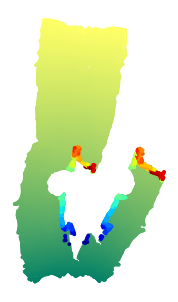

###############
Took 7.1 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0004345410844515843


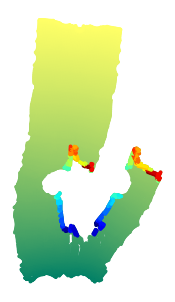

Iteration: 1
error: 0.0004252459330550877
Iteration: 2
error: 0.0004212632548271998
Iteration: 3
error: 0.0004184362782722335
Iteration: 4
error: 0.000415927816817097
Iteration: 5
error: 0.0004168337530267538


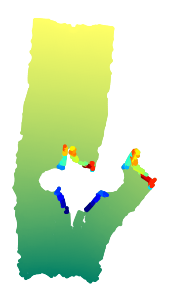

Iteration: 6
error: 0.0004160747783923991
Iteration: 7
error: 0.0004157422868863431
Iteration: 8
error: 0.00041438812394261763
Iteration: 9
error: 0.0004130290429839007
Iteration: 10
error: 0.0004193778006865308


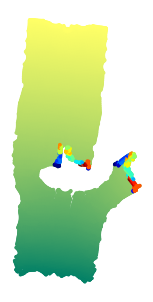

Iteration: 11
error: 0.00041440512121556917
Iteration: 12
error: 0.0004118761739042983
Iteration: 13
error: 0.0004102984169000678
Iteration: 14
error: 0.0004088078439170149
Iteration: 15
error: 0.00040730151368105255


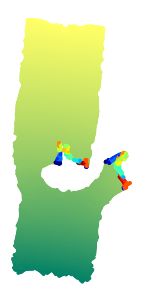

Iteration: 16
error: 0.00040596878959126513
Iteration: 17
error: 0.0004045352285360033
Iteration: 18
error: 0.0004030447732161234
Iteration: 19
error: 0.00040172215244380343
Iteration: 20
error: 0.00042060984821011934


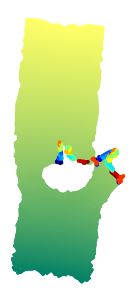

Iteration: 21
error: 0.00047483481001882604
Iteration: 22
error: 0.0005016055050965915
Iteration: 23
error: 0.0005264468092565454
Iteration: 24
error: 0.000523662270709188
Iteration: 25
error: 0.00043740933609210856


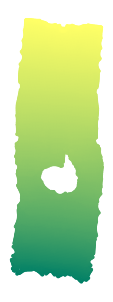

Iteration: 26
error: 0.00038728003042492
Iteration: 27
error: 0.00038592155931351104
Iteration: 28
error: 0.00038506737015643735
Iteration: 29
error: 0.00038435275959235925


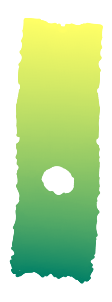

###############
Took 364.5 seconds to refine global embedding.
###############
###############
Took 372.7 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

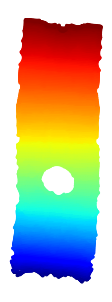

In [8]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'jet', title='LDLE0')

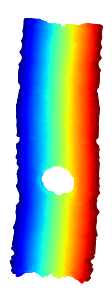

In [9]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,1], 'jet', title='LDLE1')

# LTSA

In [10]:
from matplotlib import pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

5


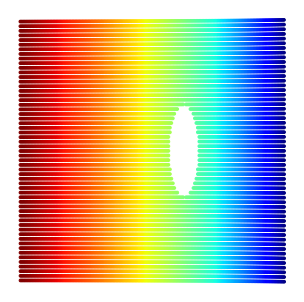

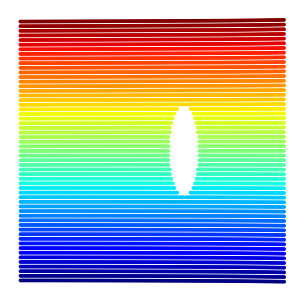

10


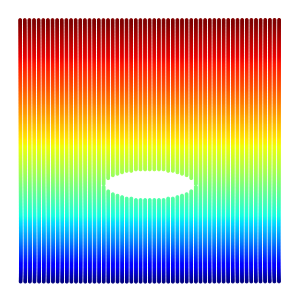

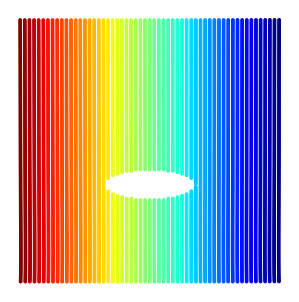

25


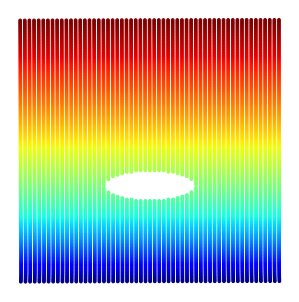

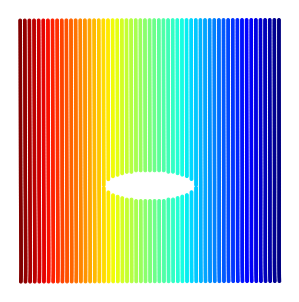

15


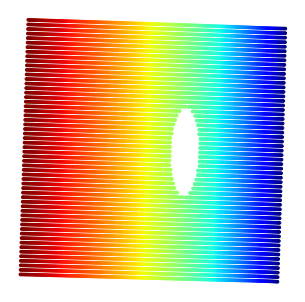

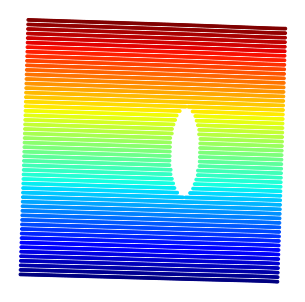

75


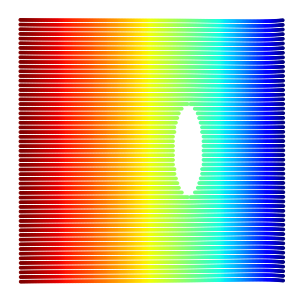

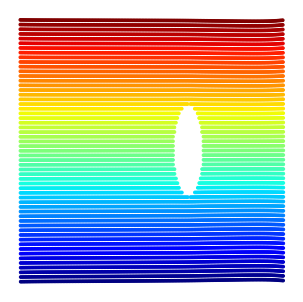

100


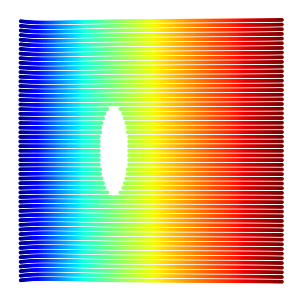

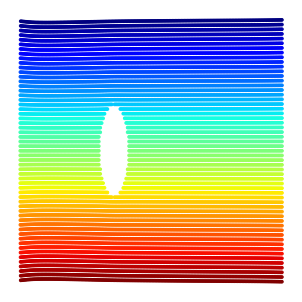

In [11]:
for n_neighbors in [5,10,25,15,75,100]:
    print(n_neighbors)
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'jet', title='LTSA0_'+str(n_neighbors))
    plt.show()
    vis.global_embedding(y_ltsa, labelsMat[:,1], 'jet', title='LTSA1_'+str(n_neighbors))
    plt.show()

# UMAP

In [12]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

25 0.01


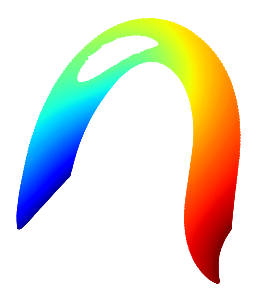

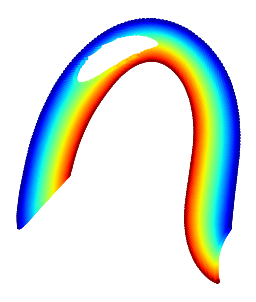

25 0.1


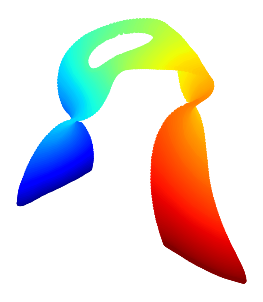

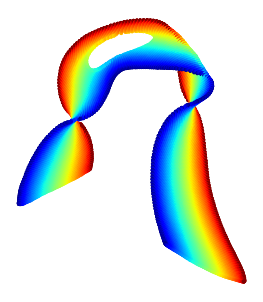

25 0.25


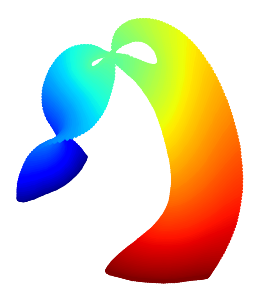

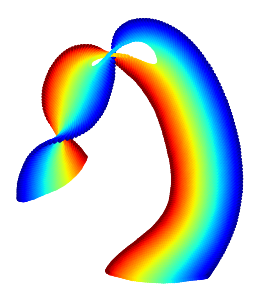

25 0.5


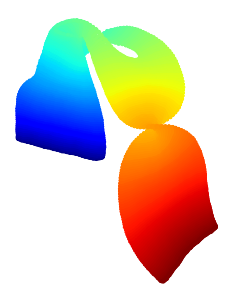

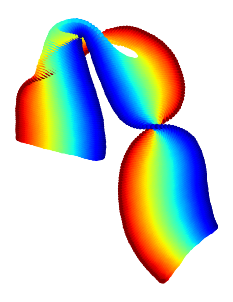

50 0.01


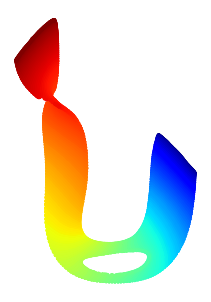

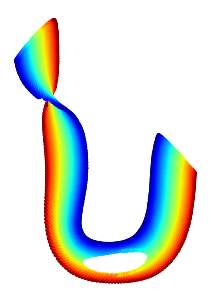

50 0.1


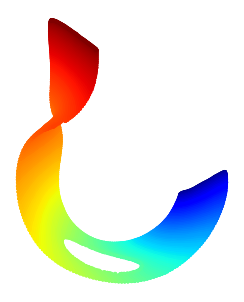

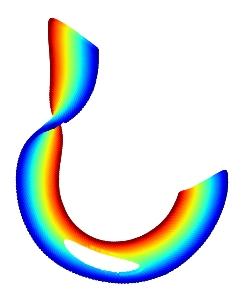

50 0.25


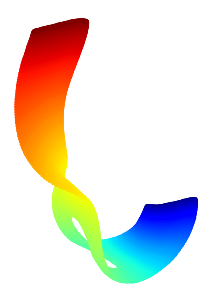

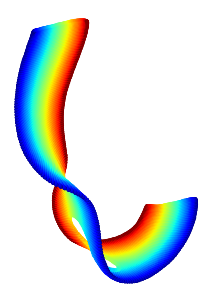

50 0.5


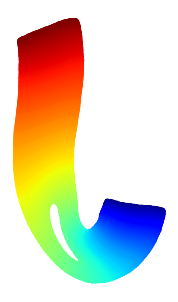

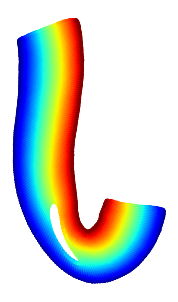

100 0.01


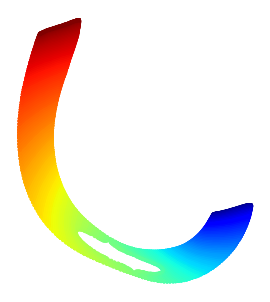

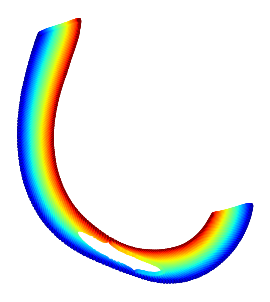

100 0.1


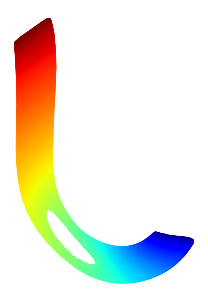

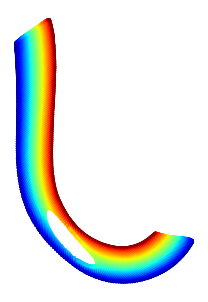

100 0.25


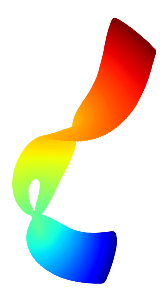

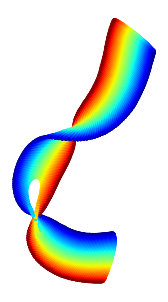

100 0.5


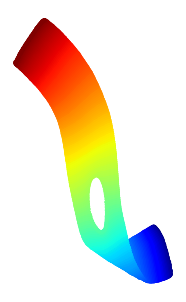

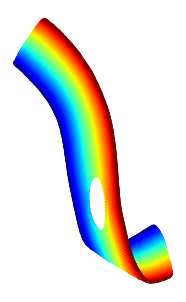

200 0.01


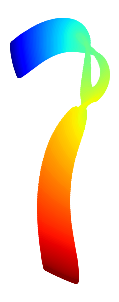

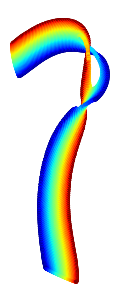

200 0.1


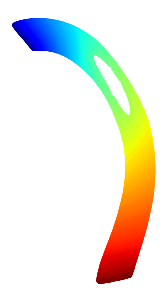

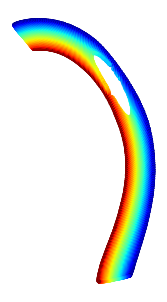

200 0.25


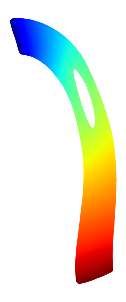

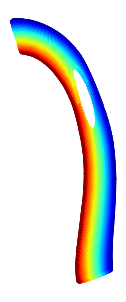

200 0.5


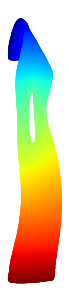

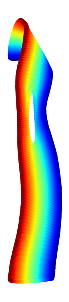

In [13]:
for n_neighbors in [25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        print(n_neighbors, min_dist)
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'jet', title='UMAP0_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()
        vis.global_embedding(y_umap, labelsMat[:,1], 'jet', title='UMAP1_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()

# t-SNE

In [14]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

30 2


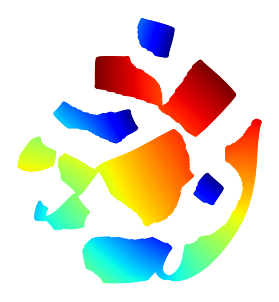

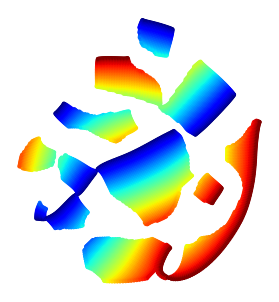

30 4


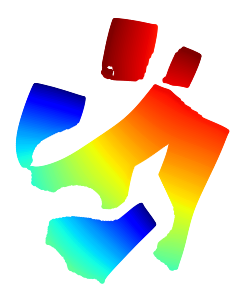

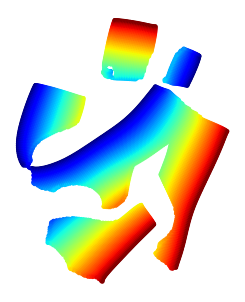

30 6


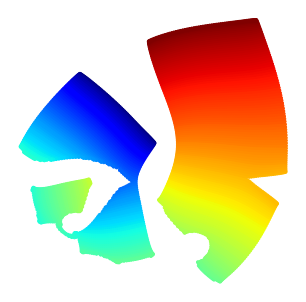

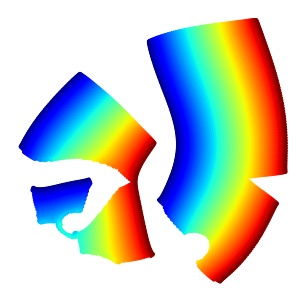

40 2


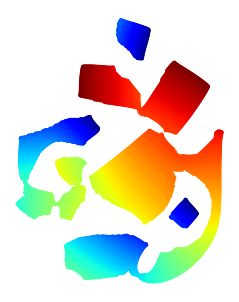

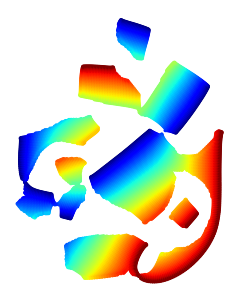

40 4


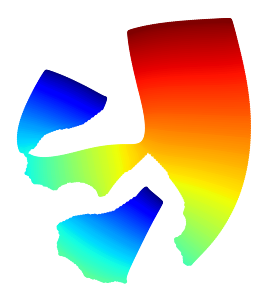

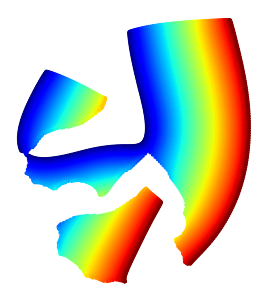

40 6


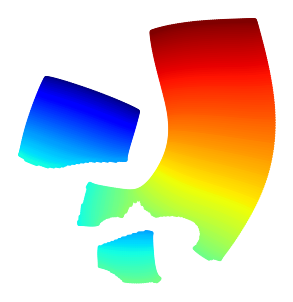

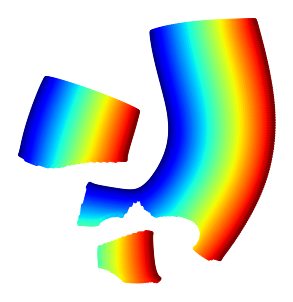

50 2


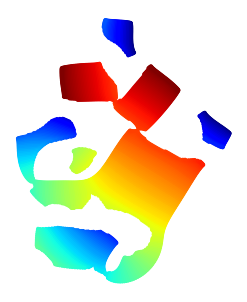

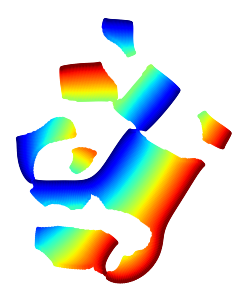

50 4


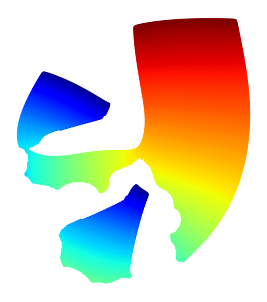

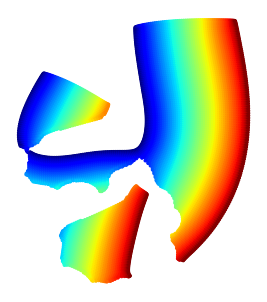

50 6


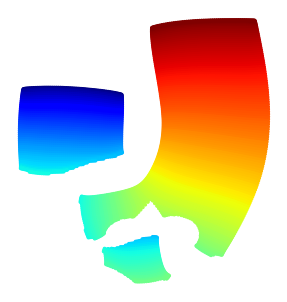

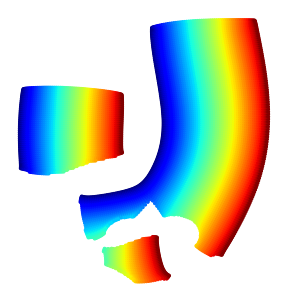

60 2


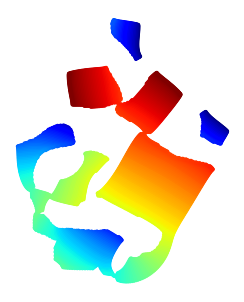

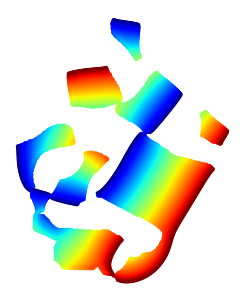

60 4


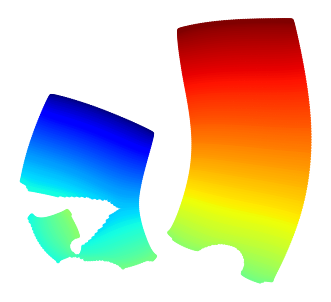

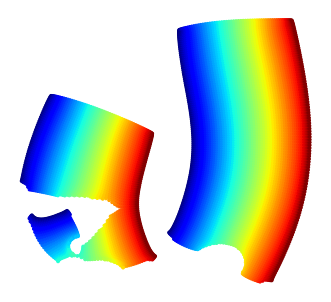

60 6


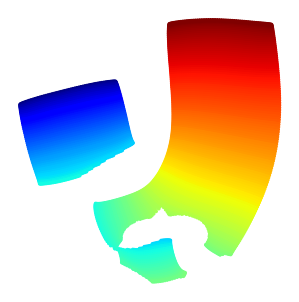

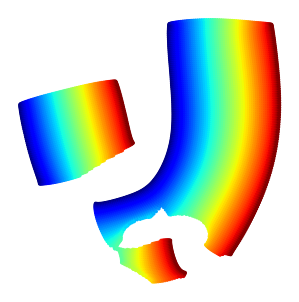

In [15]:
for perplexity in [30,40,50,60]:
    for ee in [2,4,6]:
        print(perplexity, ee)
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'jet', title='t-SNE0_'+str(perplexity)+'_'+str(ee))
        plt.show()
        vis.global_embedding(y_tsne, labelsMat[:,1], 'jet', title='t-SNE1_'+str(perplexity)+'_'+str(ee))
        plt.show()